# 5. Ordinary differential equations

## (Bonus lecture)

## NodePy demo

In [1]:
# Demo: NodePy, for MATLAB, see RKOpt
import numpy as np
from matplotlib import pyplot as plt
from nodepy import ivp # Loads set of example problems for testing

In [2]:
ivps = ivp.load_ivp('all')
for problem in sorted(ivps.values(), key = lambda x: x.name):
    print("{}: {}".format(problem.name, problem.description).rstrip())

2odes:
nlsin: A simple nonlinear scalar problem
ode1:
ode2:
test: Dahlquist's test problem; $f(y) = \lambda y$
vdp: Van der Pol oscillator with epsilon = 1/10.
zoltan: The linear scalar test problem with abs value


In [3]:
myivp = ivp.load_ivp('nlsin')

In [4]:
from nodepy import convergence
from nodepy import runge_kutta_method as rk

allrk = rk.loadRKM()
print(allrk.keys())

dict_keys(['BE', 'FE', 'SSP22star', 'LobattoIIIC4', 'LobattoIIIC3', 'LobattoIIIC2', 'LobattoIIIA2', 'LobattoIIIA3', 'RadauIIA2', 'RadauIIA3', 'SDIRK54', 'SDIRK23', 'SDIRK34', 'TR-BDF2', 'SSP22', 'Heun22', 'SSP33', 'Heun33', 'NSSP32', 'NSSP33', 'SSP43', 'SSP104', 'Lambert65', 'MTE22', 'Mid22', 'RK44', 'BuRK65', 'GL2', 'GL3', 'Fehlberg45', 'Fehlberg43', 'Merson43', 'Söderlind43', 'Soderlind43', 'Zonneveld43', 'Tsit5', 'CK5', 'HH5', 'HH5S', 'DP5', 'CMR6', 'BS3', 'BS5', 'SS3', 'PD8', 'SSP75', 'SSP85', 'SSP95', 'SSP54', 'SSP53', 'SSP63'])


In [5]:
myrk = allrk["Fehlberg45"]
print(myrk)
print("order: ", myrk.order())

Fehlberg RK5(4)6

 0           |
 1/4         | 1/4
 3/8         | 3/32         9/32
 12/13       | 1932/2197    -7200/2197   7296/2197
 1           | 439/216      -8           3680/513     -845/4104
 1/2         | -8/27        2            -3544/2565   1859/4104    -11/40
_____________|______________________________________________________________________________
             | 16/135       0            6656/12825   28561/56430  -9/50        2/55
             | 25/216                    1408/2565    2197/4104    -1/5
order:  5


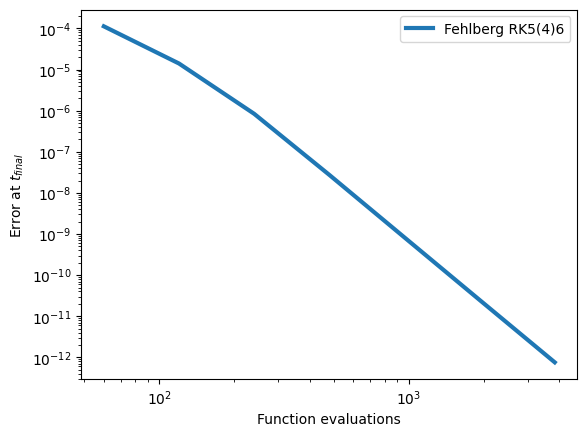

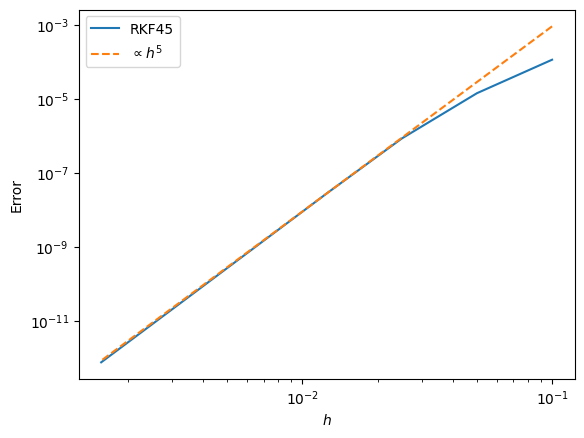

In [6]:
grids = [10, 20, 40, 80, 160, 320, 640]
hs = 1/np.array(grids)
work, err = convergence.ctest(myrk, myivp, grids = grids)
errs = np.array(err).flatten()
plt.figure()
plt.loglog(hs, errs, label = 'RKF45')
plt.loglog(hs, errs[3]/hs[3]**5*hs**5, '--', label = '$\propto h^5$')
plt.xlabel("$h$")
plt.ylabel("Error")
plt.legend()
plt.show()

(array([[ 54.,  60., 138., 258.]]),
 array([[2.01286219e-01, 4.39098715e-02, 5.00824227e-04, 2.00324727e-05]]))

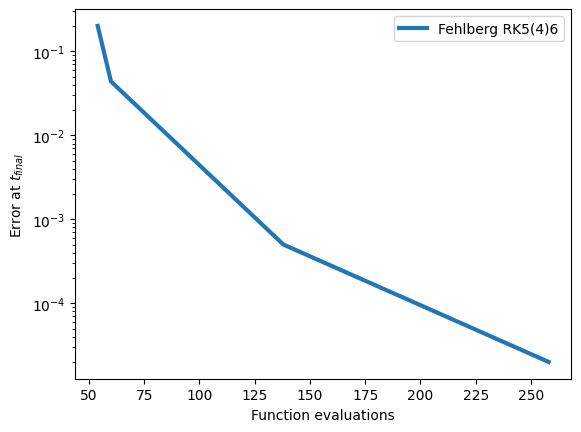

In [7]:
convergence.ptest(methods = [myrk], ivps = [myivp])